In [2]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Original data from: 
A: Leitner, Jeff. SDGs In Order: The first ever sequence for tackling the most important problems in the world. New America and OECD, 2017. http://www.sdgsinorder.org  
  
You can easily create an Excel file of this data by copying and pasting it into Excel.

In [3]:
# Import data
df_sdgs_ranked = pd.read_excel('sdgs_ranked_data.xlsx')

In [7]:
# Show the data for reference
df_sdgs_ranked

,Rank,Sustainable Development Goal,Avg. Expert Score
0,1,SDG 10: Reduced Inequalities,4.1569
1,2,SDG 1: No Poverty,3.7812
2,3,SDG 5: Gender Equality,3.5569
3,4,SDG 16: Peace Justice & Strong Institutions,3.0923
4,5,SDG 7: Affordable & Clean Energy,2.2784
5,6,SDG 4: Quality Education,2.0549
6,7,SDG 6: Clean Water & Sanitation,1.8721
7,8,SDG 8: Decent Work & Economic Growth,1.7282
8,9,SDG 3: Good Health & Well Being,1.6018
9,10,SDG 17: Partnerships for the Goals,1.5608


In [4]:
# Check all 17 sdgs are present
df_sdgs_ranked.shape

(17, 3)

In [6]:
# Calculate some basic stats, like mean and std
df_sdgs_ranked.describe()

,Rank,Avg. Expert Score
count,17.000000,17.000000
mean,9.000000,1.881612
std,5.049752,1.140713
min,1.000000,0.420600
25%,5.000000,1.023500
50%,9.000000,1.601800
75%,13.000000,2.278400
max,17.000000,4.156900


In [5]:
# Create arrays for plotting x (rank) and y (score)
x = df_sdgs_ranked['Rank'].sort_values(ascending=False)
y = df_sdgs_ranked['Avg. Expert Score']

## Boxplots

Using boxplots to visualise the spread of the data. Reveals that the max is quite far outside of Q3 but there are no outlier values.

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg. Expert Score'>

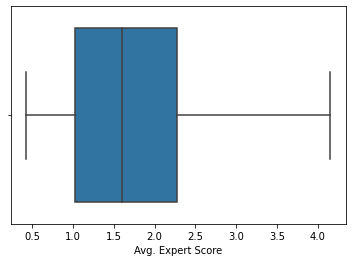

In [24]:
# Boxplot of expert scores with Seaborn

sns.boxplot(y)

<ipython-input-109-b27e208367c2>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


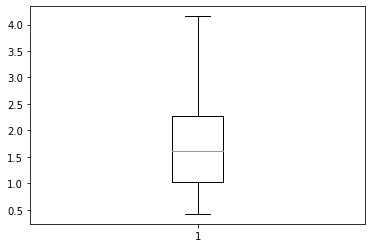

In [109]:
# Boxplot of expert scores with matplotlib

fig, ax = plt.subplots()
ax.boxplot(y)
fig.show()

## Plots with interquartile range
  
Given the spread of the data in the boxplots, I tried plotting the 

Having plotted these and the standard deviation graphs below, I see that these IQR graphs more accurately represent the spread of the data

<ipython-input-19-615ebd6fa207>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


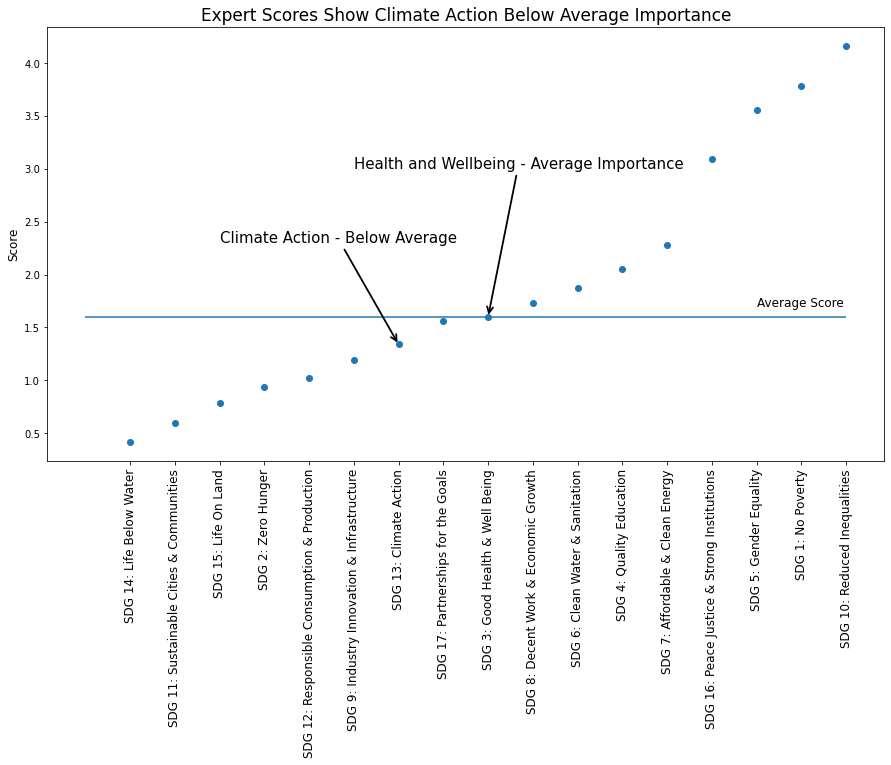

In [19]:
# Create a scatter plot of rank and score with just the median average line

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x,y)

# Add a line for the median
ax.hlines(y=1.6, xmin=0, xmax=17)

# Add annotations
ax.annotate('Health and Wellbeing - Average Importance',
            fontsize=15,
            xy=(9, 1.60),
            xytext=(6,3),
            arrowprops=dict(facecolor='black', lw=1.8,arrowstyle='->'))

ax.annotate('Climate Action - Below Average',
            fontsize=15,
            xy=(7, 1.34),
            xytext=(3,2.3),
            arrowprops=dict(facecolor='black', lw=1.8,arrowstyle='->'))

ax.text(15, 1.7, 'Average Score', fontsize=12)

# Create x labels to show the goals
xticks_list = [i for i in range(1,18)]
xticks_labels_list = df_sdgs_ranked['Sustainable Development Goal']

ax.set_xticks(xticks_list)
ax.set_xticklabels(xticks_labels_list[::-1], rotation=90, fontsize=12)

# Set axis labels and title
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Expert Scores Show Climate Action Below Average Importance', fontsize=17)

fig.show()

plt.savefig('goals and scores median', bbox_inches = "tight")

<ipython-input-20-ec7a63e0b90e>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


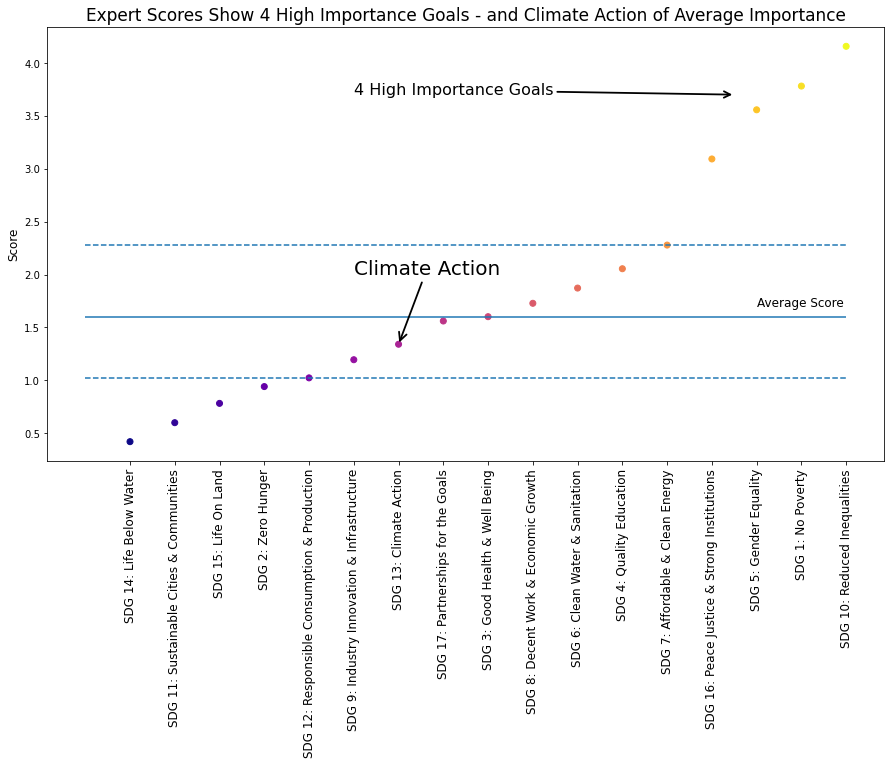

In [20]:
# Create a scatter plot of rank and score with median and IQ range marked

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x,y, c=x, cmap='plasma')


# Add a line for the mean and 1st + 3rd quartile
ax.hlines(y=1.60, xmin=0, xmax=17)
ax.hlines(y=1.02, xmin=0, xmax=17, linestyle='dashed')
ax.hlines(y=2.28, xmin=0, xmax=17, linestyle='dashed')

# Add annotations
ax.annotate('Climate Action',
            fontsize=20,
            xy=(7, 1.34),
            xytext=(6,2),
            arrowprops=dict(facecolor='black', lw=1.8,arrowstyle='->'))

ax.annotate('4 High Importance Goals',
            fontsize=16,
            xy=(14.5, 3.7),
            xytext=(6, 3.7),
            arrowprops=dict(facecolor='black', lw=1.8,arrowstyle='->'))

ax.text(15, 1.7, 'Average Score', fontsize=12)


# Create x labels to show the goals
xticks_list = [i for i in range(1,18)]
xticks_labels_list = df_sdgs_ranked['Sustainable Development Goal']

ax.set_xticks(xticks_list)
ax.set_xticklabels(xticks_labels_list[::-1], rotation=90, fontsize=12)

# Create axis labels and title
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Expert Scores Show 4 High Importance Goals - and Climate Action of Average Importance', fontsize=17)

fig.show()

plt.savefig('goals and scores IQR', bbox_inches = "tight")

## Plots with mean and standard deviations

<ipython-input-22-47b5a3210025>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


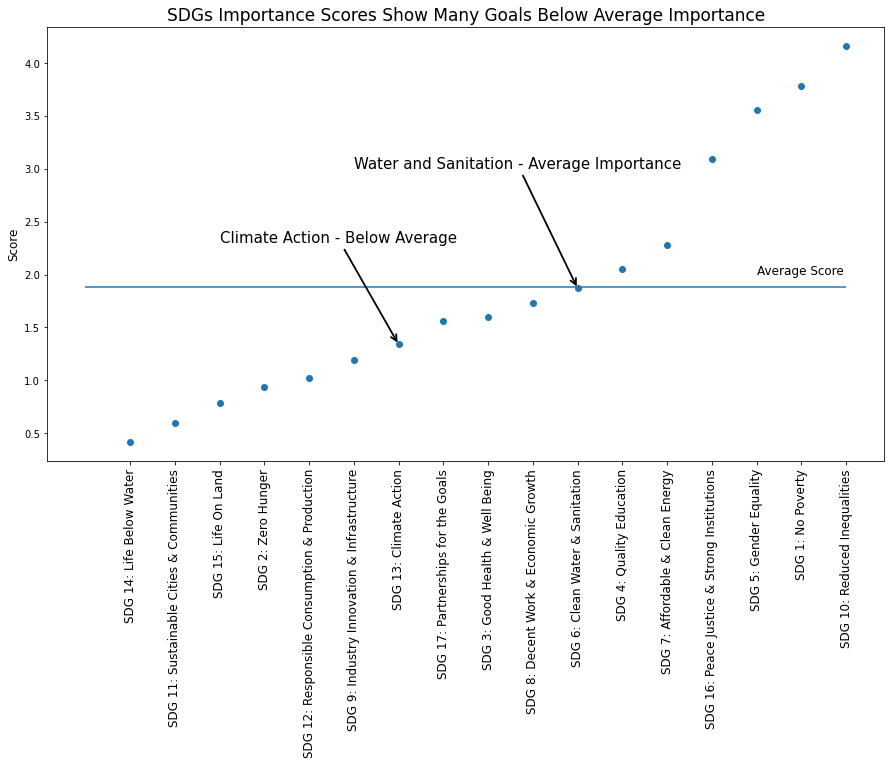

In [22]:
# Create a scatter plot of rank and score with just the mean average line

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x,y)

# Add a line for the mean
ax.hlines(y=1.88, xmin=0, xmax=17)

# Add annotations
ax.annotate('Water and Sanitation - Average Importance',
            fontsize=15,
            xy=(11, 1.87),
            xytext=(6,3),
            arrowprops=dict(facecolor='black', lw=1.8,arrowstyle='->'))

ax.annotate('Climate Action - Below Average',
            fontsize=15,
            xy=(7, 1.34),
            xytext=(3,2.3),
            arrowprops=dict(facecolor='black', lw=1.8,arrowstyle='->'))

ax.text(15, 2, 'Average Score', fontsize=12)

# Create x labels to show the goals
xticks_list = [i for i in range(1,18)]
xticks_labels_list = df_sdgs_ranked['Sustainable Development Goal']

ax.set_xticks(xticks_list)
ax.set_xticklabels(xticks_labels_list[::-1], rotation=90, fontsize=12)

# Set axis labels and title
ax.set_ylabel('Score', fontsize=12)
ax.set_title('SDGs Importance Scores Show Many Goals Below Average Importance', fontsize=17)

fig.show()

plt.savefig('goals and scores mean', bbox_inches = "tight")


<ipython-input-23-96d20c66aef5>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


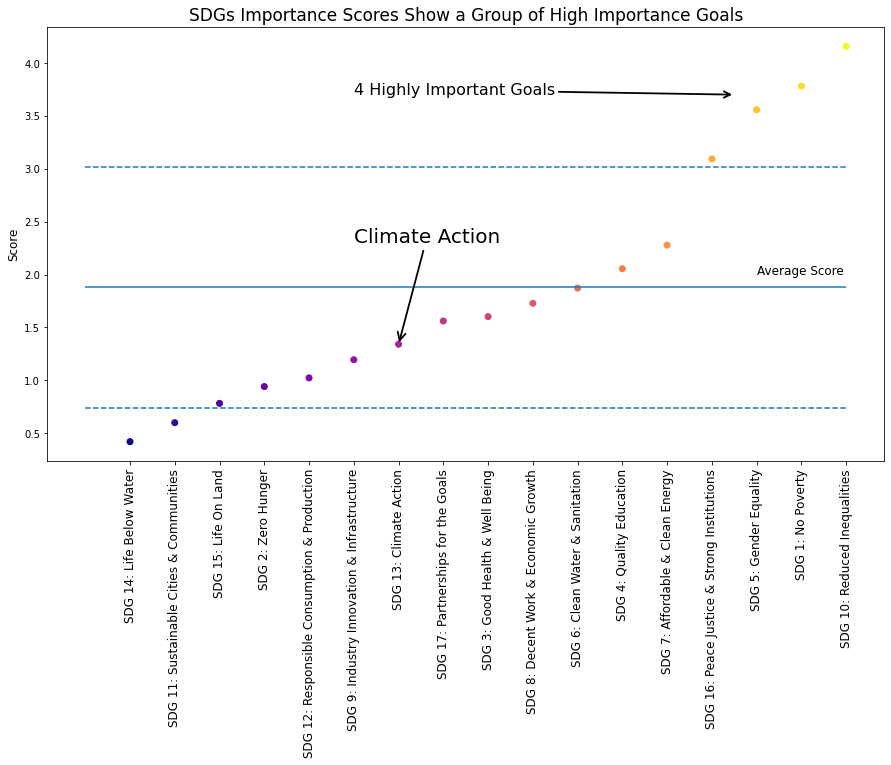

In [23]:
# Create a scatter plot of rank and score with mean and standard deviation lines marked

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x,y, c=x, cmap='plasma')


# Add a line for the mean and +/- 1 std
ax.hlines(y=1.88, xmin=0, xmax=17)
ax.hlines(y=1.88+1.14, xmin=0, xmax=17, linestyle='dashed')
ax.hlines(y=1.88-1.14, xmin=0, xmax=17, linestyle='dashed')

# Add annotations
ax.annotate('Climate Action',
            fontsize=20,
            xy=(7, 1.34),
            xytext=(6,2.3),
            arrowprops=dict(facecolor='black', lw=1.8,arrowstyle='->'))

ax.annotate('4 Highly Important Goals',
            fontsize=16,
            xy=(14.5, 3.7),
            xytext=(6, 3.7),
            arrowprops=dict(facecolor='black', lw=1.8,arrowstyle='->'))

ax.text(15, 2, 'Average Score', fontsize=12)


# Create x labels to show the goals
xticks_list = [i for i in range(1,18)]
xticks_labels_list = df_sdgs_ranked['Sustainable Development Goal']

ax.set_xticks(xticks_list)
ax.set_xticklabels(xticks_labels_list[::-1], rotation=90, fontsize=12)

# Create axis labels and title
ax.set_ylabel('Score', fontsize=12)
ax.set_title('SDGs Importance Scores Show a Group of High Importance Goals', fontsize=17)

fig.show()

plt.savefig('goals and scores std', bbox_inches = "tight")

## Histogram
To see if a histogram might help visualise this

<AxesSubplot:ylabel='Frequency'>

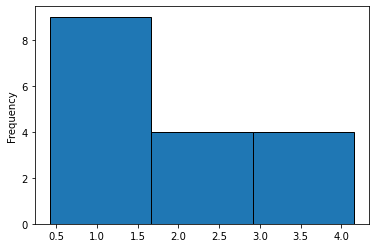

In [22]:
df_sdgs_ranked['Avg. Expert Score'].plot.hist(bins=3
                                              ,edgecolor='k')